# EDA on Haberman's Survival Data Set
### (Survival of patients who had undergone surgery for breast cancer)
# About the Dataset

## Haberman's data set 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Reference : https://www.kaggle.com/gilsousa/habermans-survival-data-set

## Feature/Variable/Input-variable/Independent-varibale
>There are 4 attributes: 'Age', 'Op_Year', 'axil_nodes', 'Surv_status'
* Feature Information: 
> * 'Age'-----------Age of patient at time of operation (numerical)
>* 'Op_Year'-----Patient's year of operation (year - 1900, numerical)
>* 'axil_nodes'--Number of positive axillary nodes detected (numerical)

## Label/Depdendent-variable
>* Survival status (class attribute)  
>--------------1 = the patient survived 5 years or longer  
>--------------2 = the patient died within 5 years


In [98]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np

In [99]:
import warnings
warnings.filterwarnings("ignore")

In [100]:
#Load haberman.csv into a pandas dataFrame.
df = pd.read_csv("haberman.csv")
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [101]:
#Rename the column name
df = df.rename(columns={'30': 'Age', '64': 'Op_Year', '1': 'axil_nodes', '1.1':  'Surv_status'})
df.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [102]:
#Data-point
print(df.shape)

print("=="*10)
print("Data points per each class: ") 
df['Surv_status'].value_counts()

(305, 4)
Data points per each class: 


1    224
2     81
Name: Surv_status, dtype: int64

# Observation:

* There are two classes 1 and 2, class 1 denotes patients who survived 5 years or longer after the operation and class 2 denotes to patients who died within 5 years of operation.

* class 1 contains 224 values and class 2 contain 81 values
* It is being clear that 224 patients survived 5 years or longer after the operation and 81 patients died within 5 years of operation.


# Bi-variate analysis  
## 1) 2-D Scatter Plot

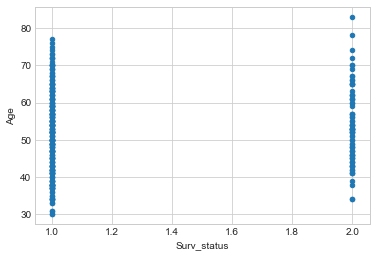

In [103]:
#Age
df.plot(kind="scatter", x ="Surv_status", y="Age")
plt.show()

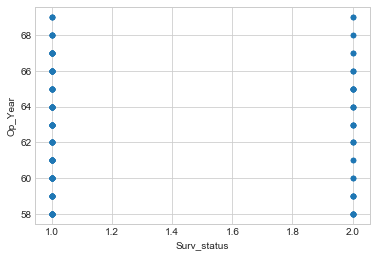

In [104]:
#Op_Year
df.plot(kind="scatter", x ="Surv_status", y="Op_Year")
plt.show()

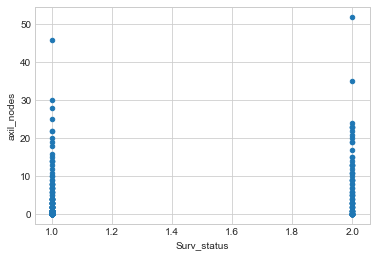

In [105]:
#axil_nodes
df.plot(kind="scatter", x ="Surv_status", y="axil_nodes")
plt.show()

# Observation
* This cann't make much sense out it. 
* we can color the points by thier Feature/Survival Status.

###  2-D Scatter plot with color-coding

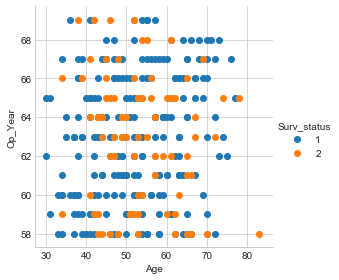

In [106]:
sbn.set_style("whitegrid");
sbn.FacetGrid(df, hue="Surv_status", size=4) \
   .map(plt.scatter, "Age", "Op_Year") \
   .add_legend();
plt.show();

## Observation
* We can plot 2-D Scatter plot with color-coding for each  Feature/Survival Status
* It's a little bit difficult to identify the plots one by one.


# Histogram
* 1-D scatter plot

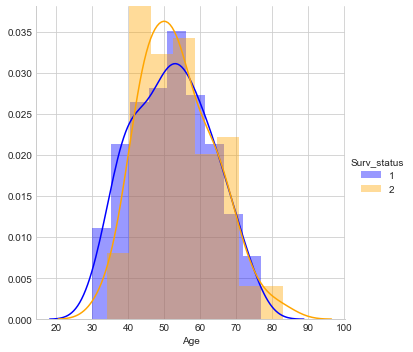

In [107]:
#Age
sbn.set_style("whitegrid")
pal = ["blue","orange"]
sbn.FacetGrid(df, hue="Surv_status", palette= pal,size = 5)\
    .map(sbn.distplot, "Age")\
    .add_legend()
plt.show()

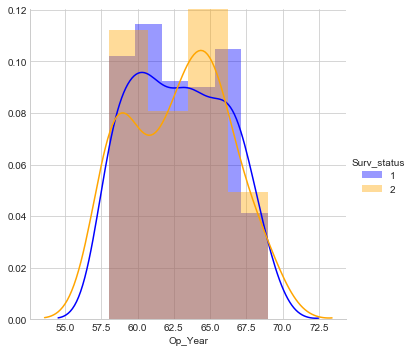

In [108]:
#Op_Year
sbn.set_style("whitegrid")
sbn.FacetGrid(df, hue= "Surv_status", palette= pal, size= 5)\
    .map(sbn.distplot, "Op_Year")\
    .add_legend()
plt.show()

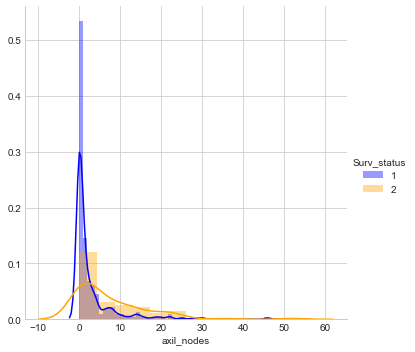

In [109]:
#axil_nodes
sbn.set_style("whitegrid")
sbn.FacetGrid(df, hue= "Surv_status", palette= pal, size= 5)\
    .map(sbn.distplot, "axil_nodes")\
    .add_legend()
plt.show()

# Univariate Analysis using PDF
* one variable analysis

In [110]:
df_survived = df.loc[df["Surv_status"] == 1]
df_died = df.loc[df["Surv_status"] == 2]

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


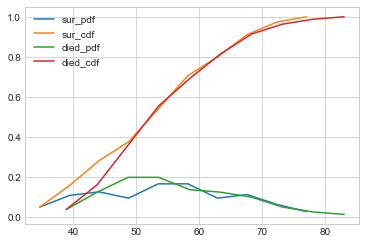

In [115]:
#Age
counts, bin_edges = np.histogram(df_survived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='sur_pdf')
plt.plot(bin_edges[1:], cdf, label='sur_cdf')

counts, bin_edges = np.histogram(df_died['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='died_pdf')
plt.plot(bin_edges[1:], cdf,label='died_cdf')
plt.legend()


plt.show()


## Observation:
* Univariate analysis based on Age gives a slightly different plot for both classes with some overlap of data points.
* it is difficult to set a threshold to distinguish the two classes.
* Age is not a very important feature for determining the survival of a patient.

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


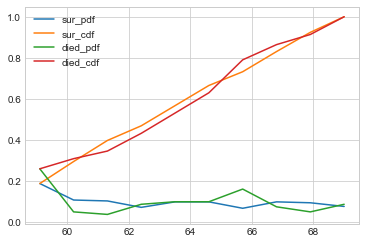

In [116]:
#Op_Year
counts, bin_edges = np.histogram(df_survived['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_died['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['sur_pdf', 'sur_cdf','died_pdf', 'died_cdf'])
#Reference: https://stackoverflow.com/questions/21624818/matplotlib-legend-including-markers-and-lines-from-two-different-graphs-in-one#21630591

plt.show()

## Observation:
* Univariate analysis based on Year_of_operation(Op_Year) gives similar plots for both classes with a huge overlap rate of data points.
* Year_of_operation(Op_Year) is not an important feature for determining the survival of a patient.
* it's also difficult to set a threshold to distinguish the two classes.

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


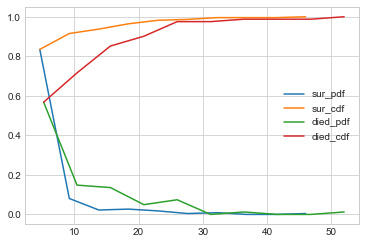

In [117]:
#axil_nodes
counts, bin_edges = np.histogram(df_survived['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_died['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['sur_pdf', 'sur_cdf','died_pdf', 'died_cdf'])
plt.show()

## Observation:
* Univariate analysis based on axil_nodes gives less overlap of data points as compared to other features.
* It's also difficult to set a threshold for axillary nodes which will differentiate both classes of patients.
* axil_nodes can be an important feature for determining the survival of a patient.


# Mean, Variance and Std-dev

In [83]:
print(df_survived.describe())

              Age     Op_Year  axil_nodes  Surv_status
count  224.000000  224.000000  224.000000        224.0
mean    52.116071   62.857143    2.799107          1.0
std     10.937446    3.229231    5.882237          0.0
min     30.000000   58.000000    0.000000          1.0
25%     43.000000   60.000000    0.000000          1.0
50%     52.000000   63.000000    0.000000          1.0
75%     60.000000   66.000000    3.000000          1.0
max     77.000000   69.000000   46.000000          1.0


In [86]:
#Median is equvalent to Mean
print("Median from df_survived")
print(np.median(df_survived["Age"]))
print(np.median(df_survived["Op_Year"]))
print(np.median(df_survived["axil_nodes"]))
print("=="*30)
print("Median from df_died")
print(np.median(df_died["Age"]))
print(np.median(df_died["Op_Year"]))
print(np.median(df_died["axil_nodes"]))

Median from df_survived
52.0
63.0
0.0
Median from df_died
53.0
63.0
4.0


In [82]:
print("\n90th Percentiles:")
print(np.percentile(df_survived["Age"],90))
print(np.percentile(df_survived["Op_Year"],90))
print(np.percentile(df_survived["axil_nodes"],90))
print("=="*30)
print(np.percentile(df_died["Age"],90))
print(np.percentile(df_died["Op_Year"],90))
print(np.percentile(df_died["axil_nodes"],90))


90th Percentiles:
67.0
67.0
8.0
67.0
67.0
20.0


In [92]:
#MAD is equevalent to std-dev
print ("\nMedian Absolute Deviation")
from statsmodels import robust
print(robust.mad(df_survived["Age"]))
print(robust.mad(df_survived["Op_Year"]))
print(robust.mad(df_survived["axil_nodes"]))
print("=="*30)
print(robust.mad(df_died["Age"]))
print(robust.mad(df_died["Op_Year"]))
print(robust.mad(df_died["axil_nodes"]))


Median Absolute Deviation
13.343419966550417
4.447806655516806
0.0
11.860817748044816
4.447806655516806
5.930408874022408


# Box plot and Whiskers

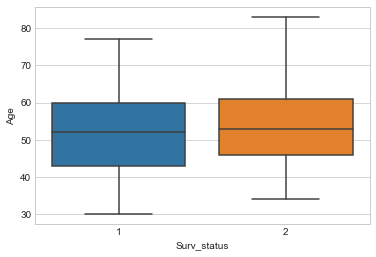

In [94]:
sbn.boxplot(x="Surv_status", y="Age", data=df)
plt.show()

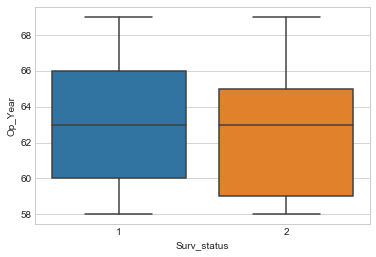

In [95]:
sbn.boxplot(x="Surv_status", y="Op_Year", data=df)
plt.show()

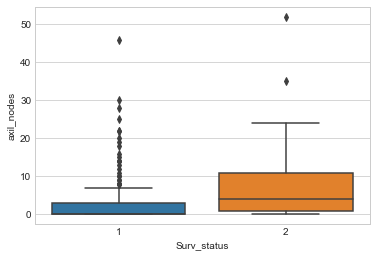

In [96]:
sbn.boxplot(x="Surv_status", y="axil_nodes", data=df)
plt.show()

# Violin plots
>Boxplot + PDF

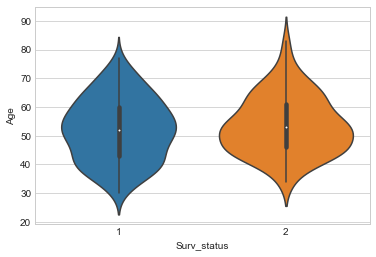

In [97]:
sbn.violinplot(x= "Surv_status", y ="Age", data=df, size= 8)
plt.show()

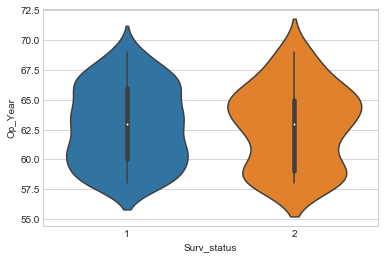

In [98]:
sbn.violinplot(x= "Surv_status", y ="Op_Year", data=df, size= 8)
plt.show()

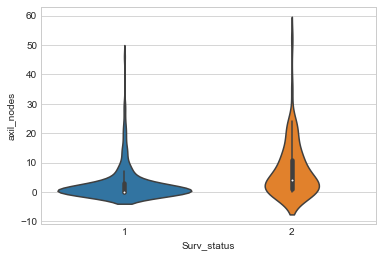

In [99]:
sbn.violinplot(x= "Surv_status", y ="axil_nodes", data=df, size= 8)
plt.show()

# Bi-variate analysis  
## 2) Pair Plot


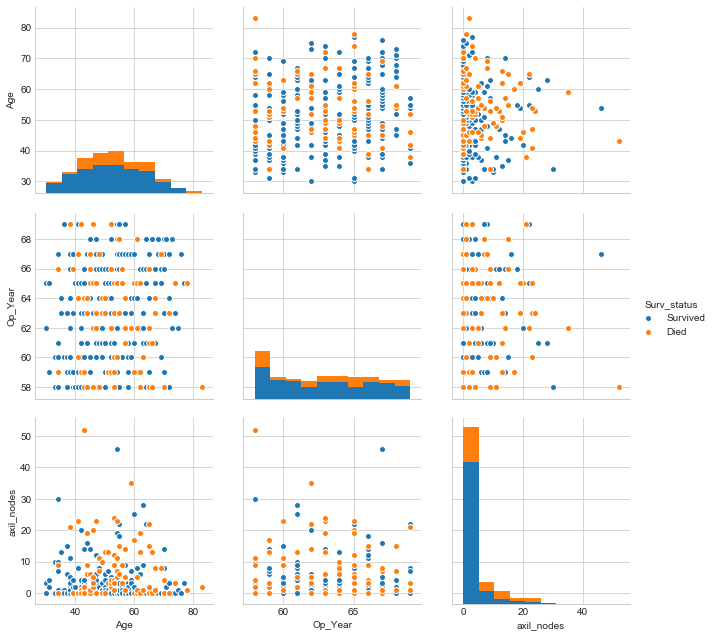

In [112]:
df["Surv_status"] = df["Surv_status"].apply(lambda x: "Survived" if x == 1 else "Died")
#reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
#https://stackoverflow.com/questions/16353729/how-do-i-use-pandas-apply-function-to-multiple-columns
sbn.pairplot(df, hue="Surv_status", size=3)
plt.show()

## Observations

* axil_nodes and Surv_status are the most useful features to identify Survival status of the patitents.
* We can use "line: between both" and "if-else" conditions to build a simple model to classify patients status.

# Multivariate probability density, contour plot.

[]

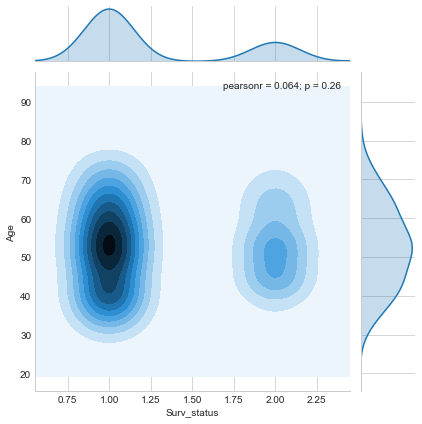

In [104]:
sbn.jointplot(x= "Surv_status", y="Age", data= df, kind= "kde")
plt.plot()

[]

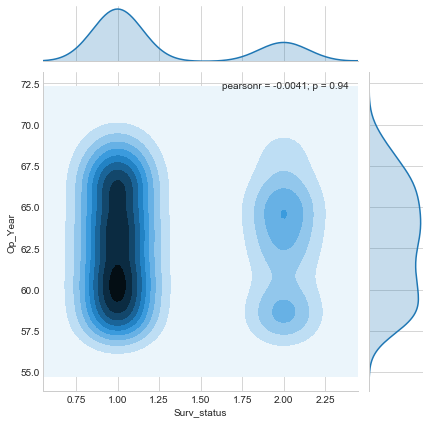

In [103]:
sbn.jointplot(x= "Surv_status", y="Op_Year", data= df, kind= "kde")
plt.plot()

[]

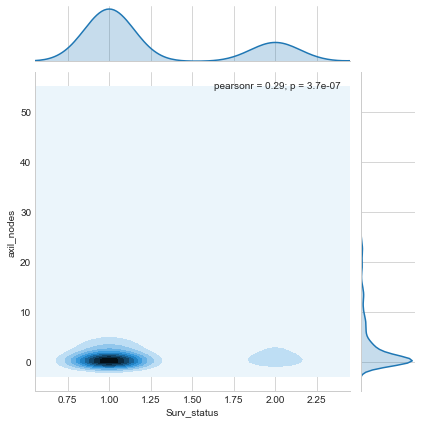

In [105]:
sbn.jointplot(x= "Surv_status", y="axil_nodes", data= df, kind= "kde")
plt.plot()

# Conclusions:
* Patient's age(Age) and year of operation(Op_Year) only can not define the survival status that, the patient survived 5 years or longer or died within 5 years.  it is difficult to predict.

* axillary(axil_nodes) node plays important role to perform EDA on Haberman's Data Set.


